## 随机的梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
m =  100000
x = np.random.normal(size=m)
print(x.max())
print(x.min())

4.3922213025773695
-4.690808963107657


In [8]:
X = x.reshape(-1,1)
y = 4.* x + 3. + np.random.normal(0,3,size=m)

<function matplotlib.pyplot.show(*args, **kw)>

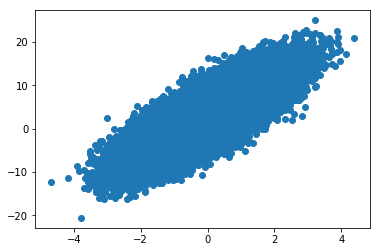

In [10]:
plt.scatter(x,y)
plt.show

In [13]:
def J(theta,X_b,y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')

def dJ(theta,X_b,y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break

        cur_iter += 1

    return theta

In [17]:
np.ones((len(X),1))

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [18]:
X_b = np.hstack([np.ones((len(X),1)), X])
X_b

array([[ 1.        , -2.1300213 ],
       [ 1.        , -0.26896172],
       [ 1.        ,  0.41178643],
       ...,
       [ 1.        , -1.32651212],
       [ 1.        ,  1.32422792],
       [ 1.        , -1.20420377]])

In [19]:
initial_theta = np.zeros(X_b.shape[1])
initial_theta

array([0., 0.])

In [21]:
eta=0.01

In [24]:
theta = gradient_descent(X_b,y,initial_theta,eta=eta)

In [25]:
theta

array([3.01701708, 3.99573722])

## 随机梯度下降法


In [26]:
def dJ_sgd(theta, X_b_i, y_i):
    return 2 * X_b_i.T.dot(X_b_i.dot(theta) - y_i)

def sgd(X_b, y, initial_theta, n_iters):

    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t + t1)

    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i]) # 对其中一个维度求导.
        theta = theta - learning_rate(cur_iter) * gradient

    return theta

In [28]:
%%time
X_b = np.hstack([np.ones((len(X),1)),X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b,y,initial_theta,n_iters=m//3)

CPU times: user 211 ms, sys: 7.79 ms, total: 219 ms
Wall time: 217 ms


In [29]:
theta

array([2.98774651, 3.97458381])